In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, auc, precision_recall_curve,
                             roc_curve)
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

In [29]:
def generate_artificial_dataset(b, k, n):
    # Define the relevant and irrelevant variables
    relevant = 5
    irrelevant = k
    
    # Generate the relevant features
    X_relevant = np.random.normal(0, 1, size=(n, relevant))
    
    # Generate the irrelevant features
    X_irrelevant = np.random.normal(0, 1, size=(n, irrelevant))
    
    # Concatenate the relevant and irrelevant features
    X = np.hstack((X_relevant, X_irrelevant))
    
    # Define the coefficients
    beta = np.zeros(relevant + irrelevant)
    beta[:relevant] = b
    
    # Calculate the probabilities
    p = 1 / (1 + np.exp(-np.dot(X, beta)))
    
    # Generate the labels
    y = np.random.binomial(1, p)
    
    return X, y


def evaluate_model(model, X, y, eval_schemes):
    results = {}
    
    # Refitting
    if 'refitting' in eval_schemes:
        model.fit(X, y)
        y_pred = model.predict(X)
        results['refitting'] = accuracy_score(y, y_pred)
    
    # 10-fold cross-validation
    if 'cross_val' in eval_schemes:
        cv_scores = cross_val_score(model, X, y, cv=10)
        results['cross_val'] = np.mean(cv_scores)
    
    # Bootstrap
    if 'bootstrap' in eval_schemes:
        bs_scores = []
        for i in range(100):
            X_bs, y_bs = resample(X, y)
            model.fit(X_bs, y_bs)
            y_pred_bs = model.predict(X_bs)
            bs_scores.append(accuracy_score(y_bs, y_pred_bs))
        results['bootstrap'] = np.mean(bs_scores)
    
    # Bootstrap 0.632
    if 'bootstrap_632' in eval_schemes:
        bs_632_scores = []
        for i in range(100):
            X_bs, y_bs = resample(X, y)
            model.fit(X_bs, y_bs)
            y_pred_bs = model.predict(X_bs)
            bs_632_scores.append(0.368 * accuracy_score(y_bs, y_pred_bs) + 0.632 * accuracy_score(y, model.predict(X)))
        results['bootstrap_632'] = np.mean(bs_632_scores)
    
    return results


def plot_curves(X, y):
    # Fit logistic regression model
    lr = LogisticRegression()
    lr.fit(X, y)
    
    # Calculate true positive rate, false positive rate, precision, and recall
    y_score = lr.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_score)
    precision, recall, _ = precision_recall_curve(y, y_score)
    
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    pr_auc = auc(recall, precision)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    # Plot precision-recall curve
    plt.figure()
    plt.plot(recall, precision, label='Precision-recall curve (AUC = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc="lower right")
    
    plt.show()


In [21]:
# Load the breast cancer dataset
data = load_breast_cancer()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# # Scale the data using StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [22]:
# Fit logistic regression model
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression accuracy: {acc_log_reg:.3f}")

# Fit classification tree model
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_pred_clf_tree = clf_tree.predict(X_test)
acc_clf_tree = accuracy_score(y_test, y_pred_clf_tree)
print(f"Classification Tree accuracy: {acc_clf_tree:.3f}")

Logistic Regression accuracy: 0.956
Classification Tree accuracy: 0.947


c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# Load the breast cancer dataset
X, y = generate_artificial_dataset(1, 20, 1000)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression accuracy: {acc_log_reg:.3f}")

# Fit classification tree model
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_pred_clf_tree = clf_tree.predict(X_test)
acc_clf_tree = accuracy_score(y_test, y_pred_clf_tree)
print(f"Classification Tree accuracy: {acc_clf_tree:.3f}")

Logistic Regression accuracy: 0.715
Classification Tree accuracy: 0.650


In [ ]:
# Load the breast cancer dataset
X, y = generate_artificial_dataset(b=1, k=20, n=1000)

In [27]:
# Evaluate the model using different schemes
eval_schemes = ['refitting', 'cross_val', 'bootstrap', 'bootstrap_632']
results = evaluate_model(log_reg, X, y, eval_schemes)

# Print the results
print('Results:')
for scheme, score in results.items():
    print(f'{scheme}: {score:.3f}')

Results:
refitting: 0.793
cross_val: 0.774
bootstrap: 0.801
bootstrap_632: 0.794


In [28]:
# Evaluate the model using different schemes
eval_schemes = ['refitting', 'cross_val', 'bootstrap', 'bootstrap_632']
results = evaluate_model(clf_tree, X, y, eval_schemes)

# Print the results
print('Results:')
for scheme, score in results.items():
    print(f'{scheme}: {score:.3f}')

Results:
refitting: 1.000
cross_val: 0.646
bootstrap: 1.000
bootstrap_632: 0.915


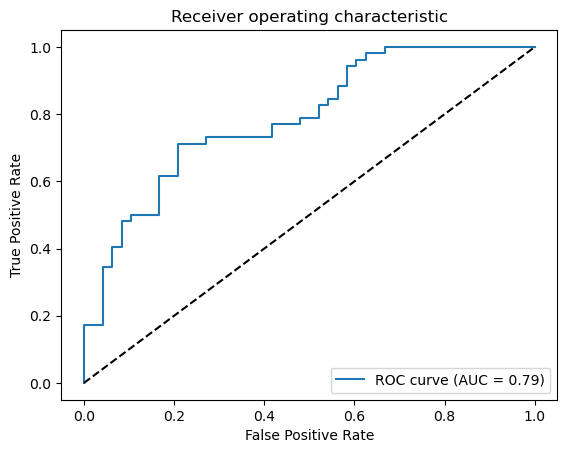

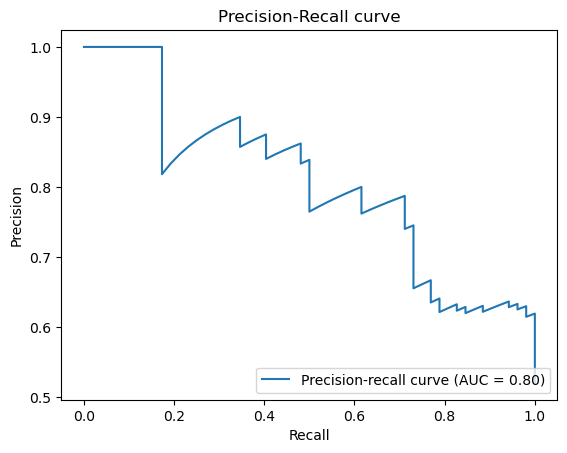

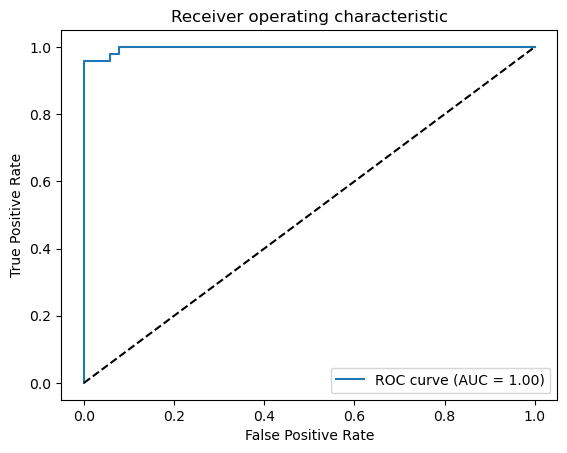

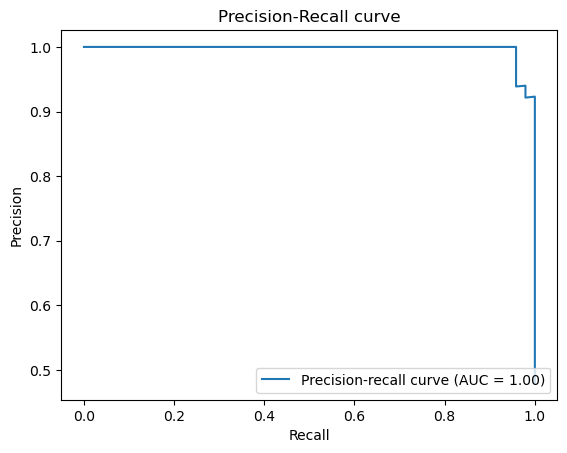

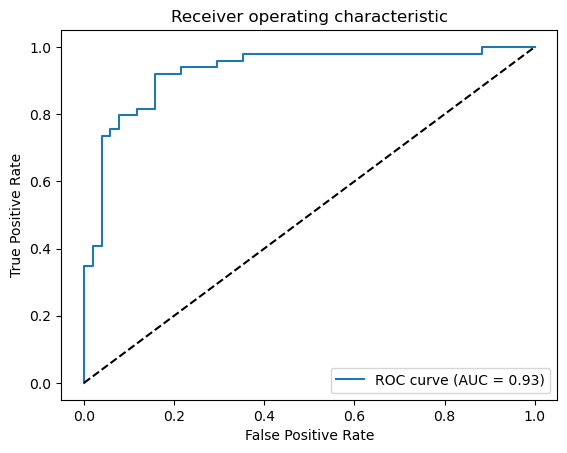

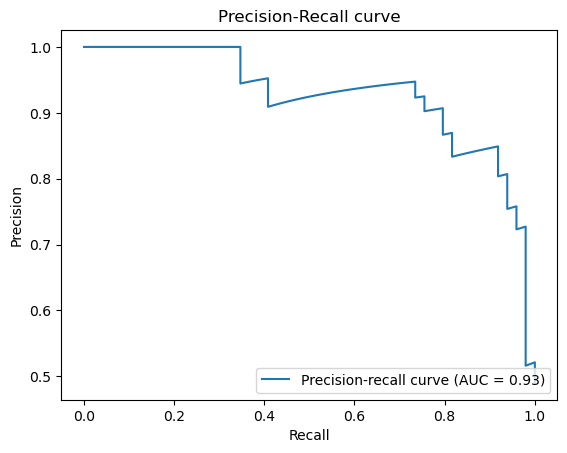

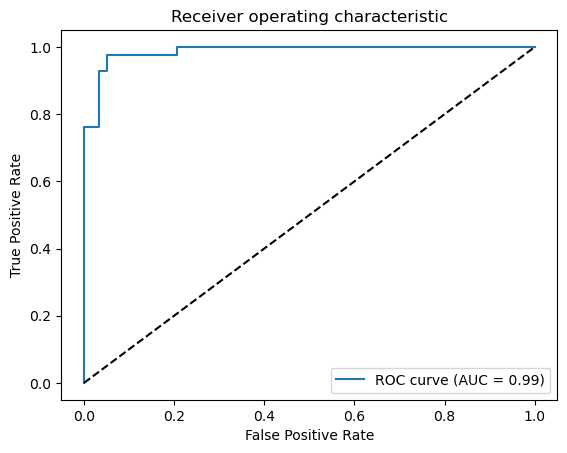

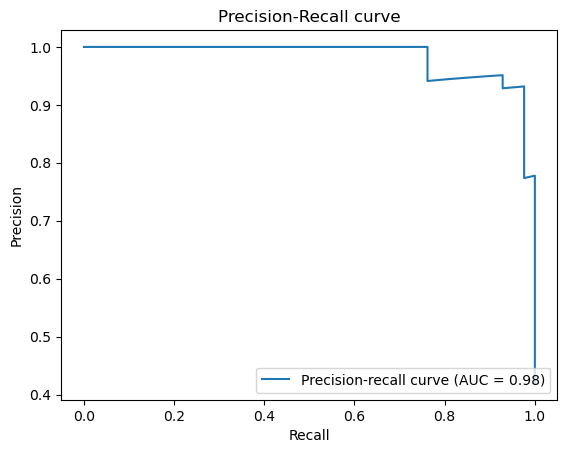

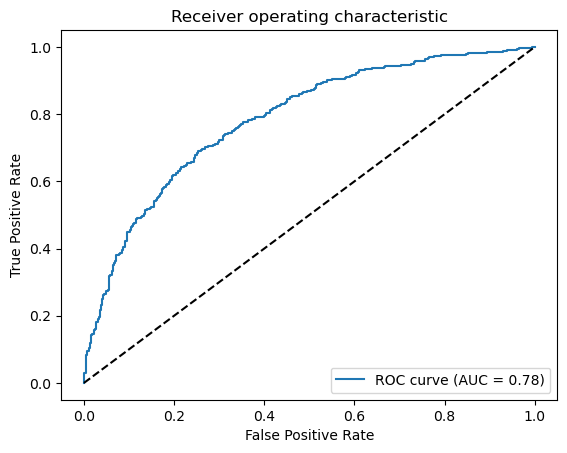

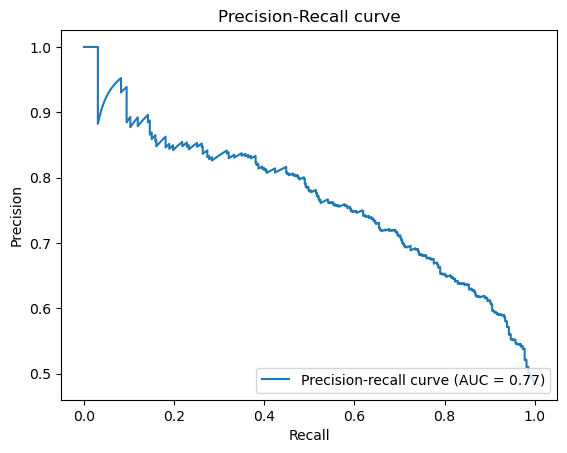

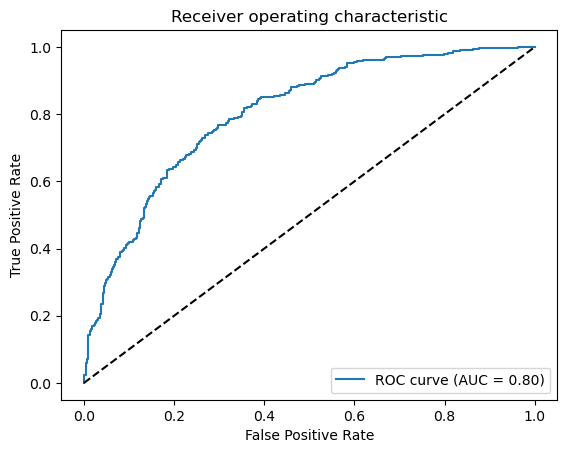

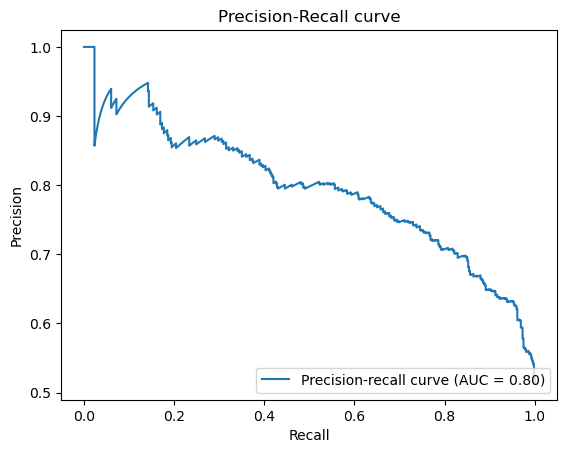

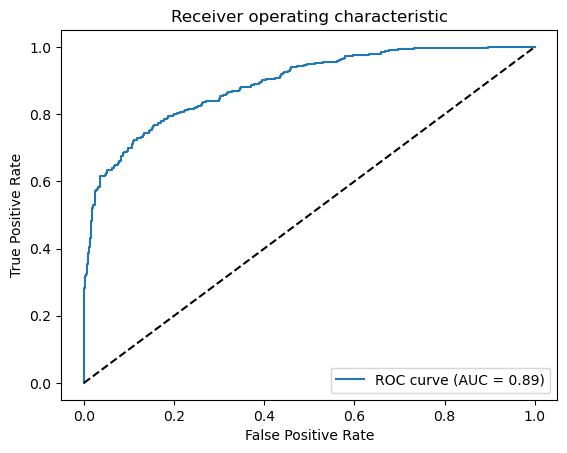

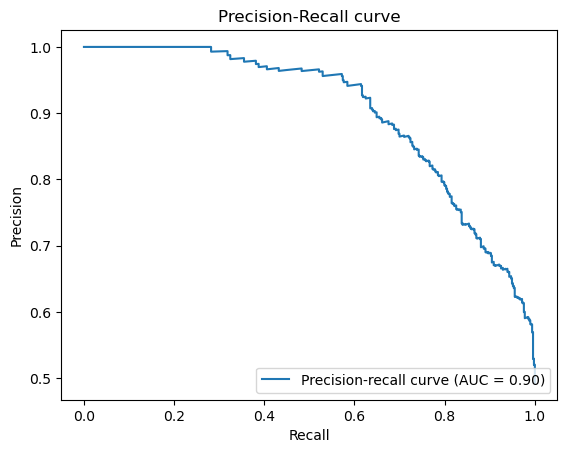

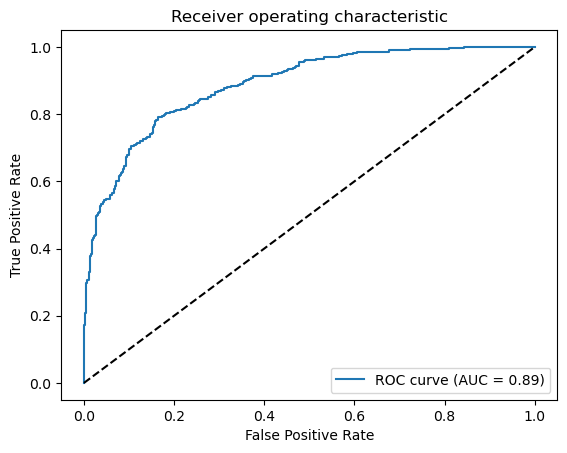

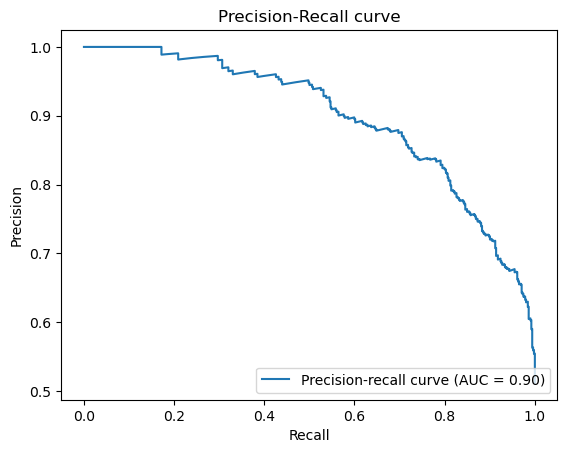

In [30]:
# Define different values of parameters
n_values = [100, 1000]
b_values = [0.5, 1]
k_values = [5, 50]

for n in n_values:
    for b in b_values:
        for k in k_values:
            # Generate artificial dataset
            X, y = generate_artificial_dataset(b=b, k=k, n=n)
            
            # Plot curves
            plot_curves(X, y)